In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

clinic = pd.read_csv("clinic.csv")

In [2]:
temp = clinic[["StudySubjectID","mrs_d90d_c"]]
temp

,StudySubjectID,mrs_d90d_c
0,AMC001,"mRS 3 - Moderate disability, still independent..."
1,AMC002,mRS 4 - Moderately severe disability (code 2)
2,AMC003,"mRS 5 - Severe disability, completely dependen..."
3,AMC004,"mRS 3 - Moderate disability, still independent..."
4,AMC005,mRS 4 - Moderately severe disability (code 2)
...,...,...
495,VUMC001,mRS 4 - Moderately severe disability (code 2)
496,VUMC002,mRS 4 - Moderately severe disability (code 2)
497,VUMC003,mRS 4 - Moderately severe disability (code 2)
498,VUMC004,mRS 4 - Moderately severe disability (code 2)


In [3]:
temp["StudySubjectID"] = temp.StudySubjectID.apply(lambda s: s[:3])

/var/folders/0b/2t921x515nx6m_3_8czjwjs80000gn/T/ipykernel_5986/1546840547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["StudySubjectID"] = temp.StudySubjectID.apply(lambda s: s[:3])


In [4]:
center_analysis = pd.concat( [temp.StudySubjectID.apply(lambda s: s[:3]) , temp.mrs_d90d_c],  axis=1)
center_analysis

,StudySubjectID,mrs_d90d_c
0,AMC,"mRS 3 - Moderate disability, still independent..."
1,AMC,mRS 4 - Moderately severe disability (code 2)
2,AMC,"mRS 5 - Severe disability, completely dependen..."
3,AMC,"mRS 3 - Moderate disability, still independent..."
4,AMC,mRS 4 - Moderately severe disability (code 2)
...,...,...
495,VUM,mRS 4 - Moderately severe disability (code 2)
496,VUM,mRS 4 - Moderately severe disability (code 2)
497,VUM,mRS 4 - Moderately severe disability (code 2)
498,VUM,mRS 4 - Moderately severe disability (code 2)


In [5]:
center_count = center_analysis.StudySubjectID.value_counts()
center_count

ANT    80
AMC    69
LUM    60
AZM    58
RIJ    53
MCH    50
EMC    26
HAG    25
UMC    22
RAD    18
EZH    16
ISA    10
RDG     7
VUM     5
ATR     1
Name: StudySubjectID, dtype: int64

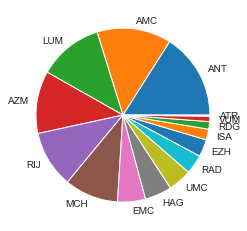

In [6]:
plt.pie(x=center_count.values, labels=center_count.index)
plt.show()

In [7]:
center_count.index.to_list()

['ANT',
 'AMC',
 'LUM',
 'AZM',
 'RIJ',
 'MCH',
 'EMC',
 'HAG',
 'UMC',
 'RAD',
 'EZH',
 'ISA',
 'RDG',
 'VUM',
 'ATR']

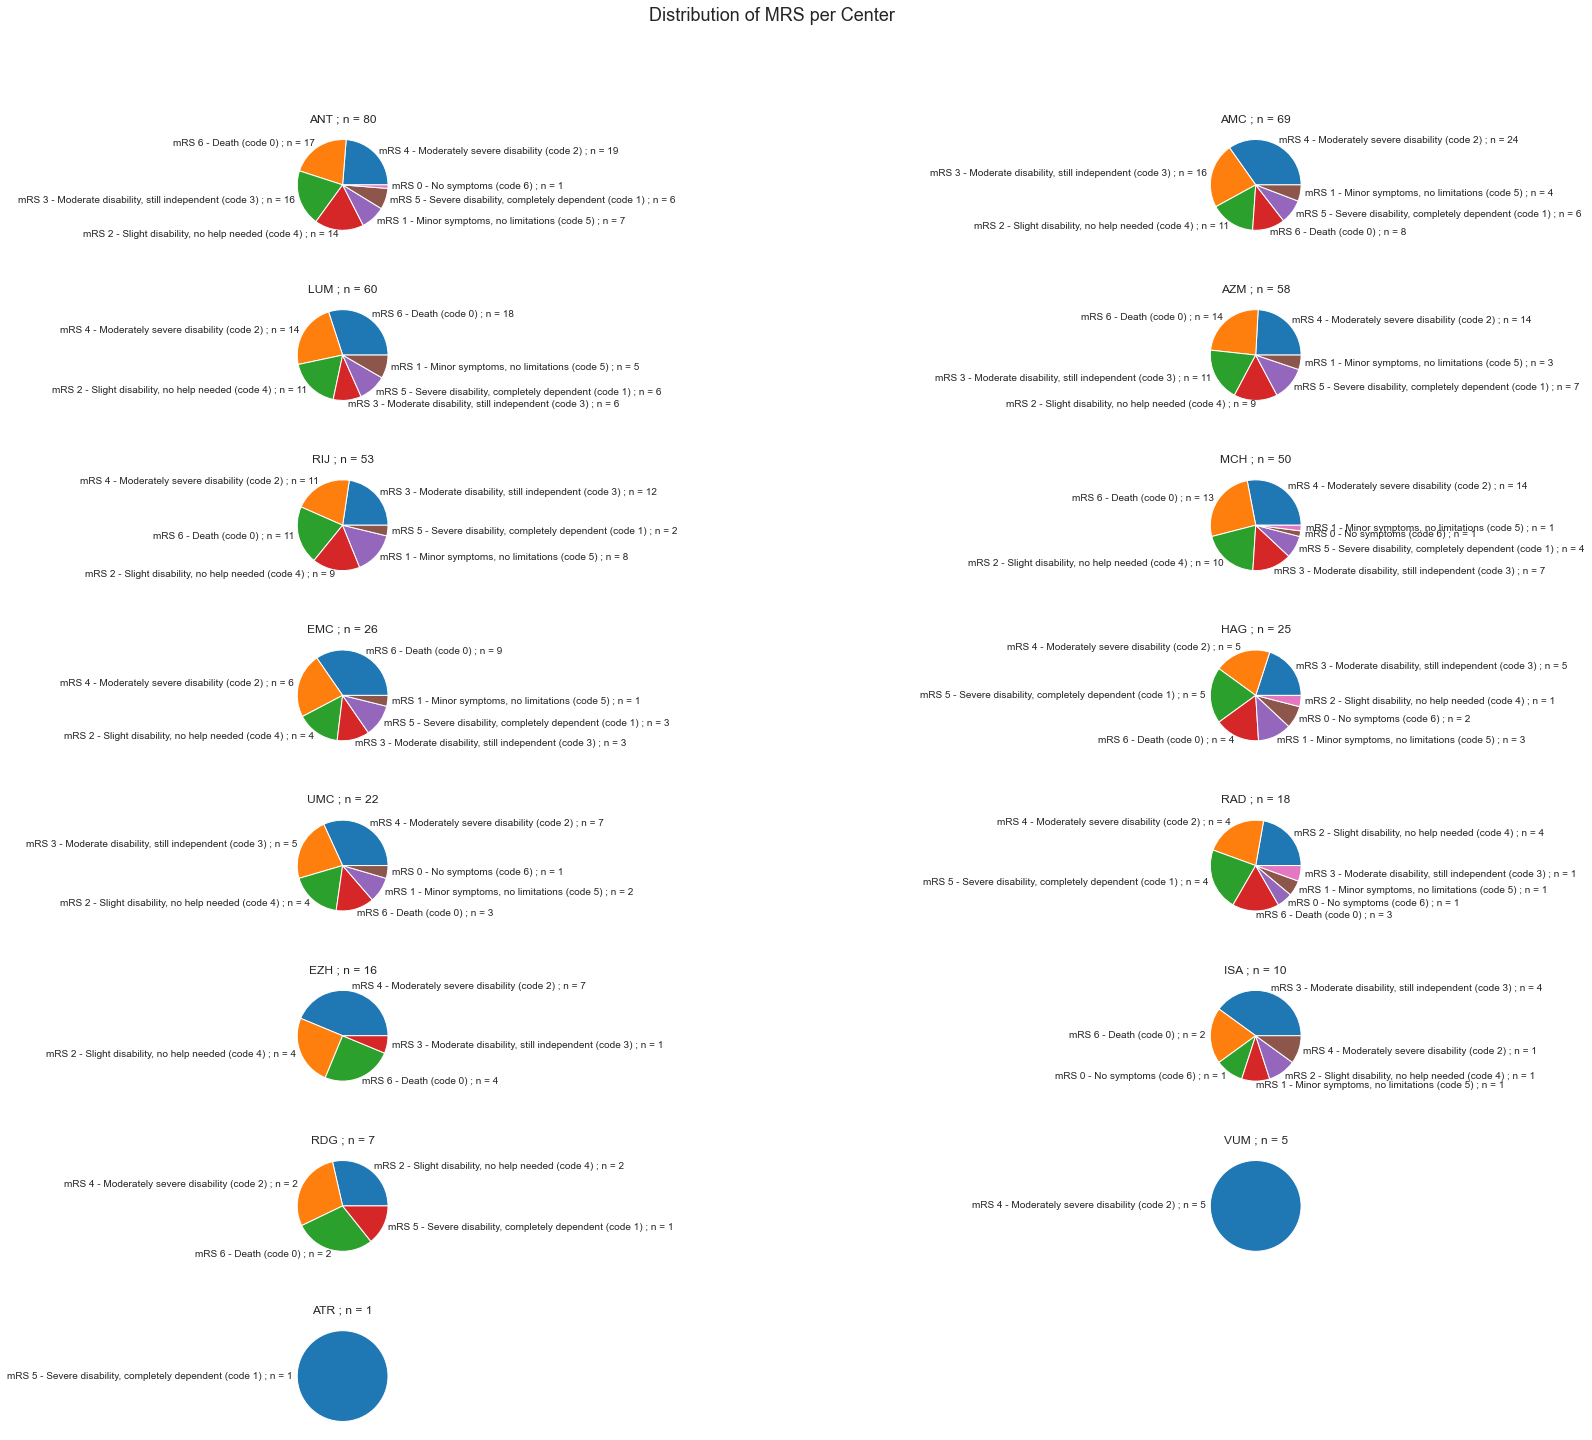

In [8]:
plt.figure(figsize=(30, 24))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of MRS per Center", fontsize=18, y=0.95)

n = 0
# loop through the length of tickers and keep track of index
for center in center_count.index.to_list():
    # add a new subplot iteratively
    ax = plt.subplot(8, 2, n + 1)

    center_df = center_analysis[center_analysis["StudySubjectID"] == center]["mrs_d90d_c"].to_frame()

    x = center_df.value_counts().values


    count_df = pd.DataFrame( center_df.value_counts().to_list(), columns=["Count"])

    label_df = center_df.value_counts().index.get_level_values(0).to_frame(index=False, name="Label")

    #y = center_analysis[center_analysis["StudySubjectID"] == center]["mrs_d90d_c"].to_frame().value_counts().index.astype(str)

    y = label_df.Label.astype(str) +  " ; n = " +  count_df["Count"].astype(str)


    # filter df and plot ticker on the new subplot axis
    #center_analysis[center_analysis["StudySubjectID"] == center].plot(ax=ax)
    ax.pie(x=x, labels=y)


    # chart formatting
    ax.set_title(center + ' ; n = ' + str(x.sum()))
    ax.set_xlabel("")

    n += 1

In [9]:
y_val_to_replace = {'mRS 0 - No symptoms (code 6)': 0,
                    'mRS 1 - Minor symptoms, no limitations (code 5)': 0,
                    'mRS 2 - Slight disability, no help needed (code 4)': 0,
                    'mRS 3 - Moderate disability, still independent (code 3)': 1,
                    'mRS 4 - Moderately severe disability (code 2)': 1,
                    'mRS 5 - Severe disability, completely dependent (code 1)': 1,
                    'mRS 6 - Death (code 0)': 1}
y_baseline = center_analysis.replace(y_val_to_replace)

In [10]:
y_baseline

,StudySubjectID,mrs_d90d_c
0,AMC,1
1,AMC,1
2,AMC,1
3,AMC,1
4,AMC,1
...,...,...
495,VUM,1
496,VUM,1
497,VUM,1
498,VUM,1


In [11]:
def plot_feature_per_center(df: pd.DataFrame):

    plt.figure(figsize=(30, 24))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Distribution of MRS per Center", fontsize=18, y=0.95)

    n = 0

    # loop through the length of tickers and keep track of index
    for center in df.StudySubjectID.value_counts().index.to_list():
        # add a new subplot iteratively
        ax = plt.subplot(8, 2, n + 1)

        center_df = df[df["StudySubjectID"] == center]["mrs_d90d_c"].to_frame()

        x = center_df.value_counts().values


        count_df = pd.DataFrame( center_df.value_counts().to_list(), columns=["Count"])

        label_df = center_df.value_counts().index.get_level_values(0).to_frame(index=False, name="Label")

        #y = df[center_analysis["StudySubjectID"] == center]["mrs_d90d_c"].to_frame().value_counts().index.astype(str)

        y = label_df.Label.astype(str) +  " ; n = " +  count_df["Count"].astype(str)


        # filter df and d ticker on the new subplot axis
        #df[df["StudySubjectID"] == center].plot(ax=ax)
        ax.pie(x=x, labels=y)


        # chart formatting
        ax.set_title(center + ' ; n = ' + str(x.sum()))
        ax.set_xlabel("")

        n += 1

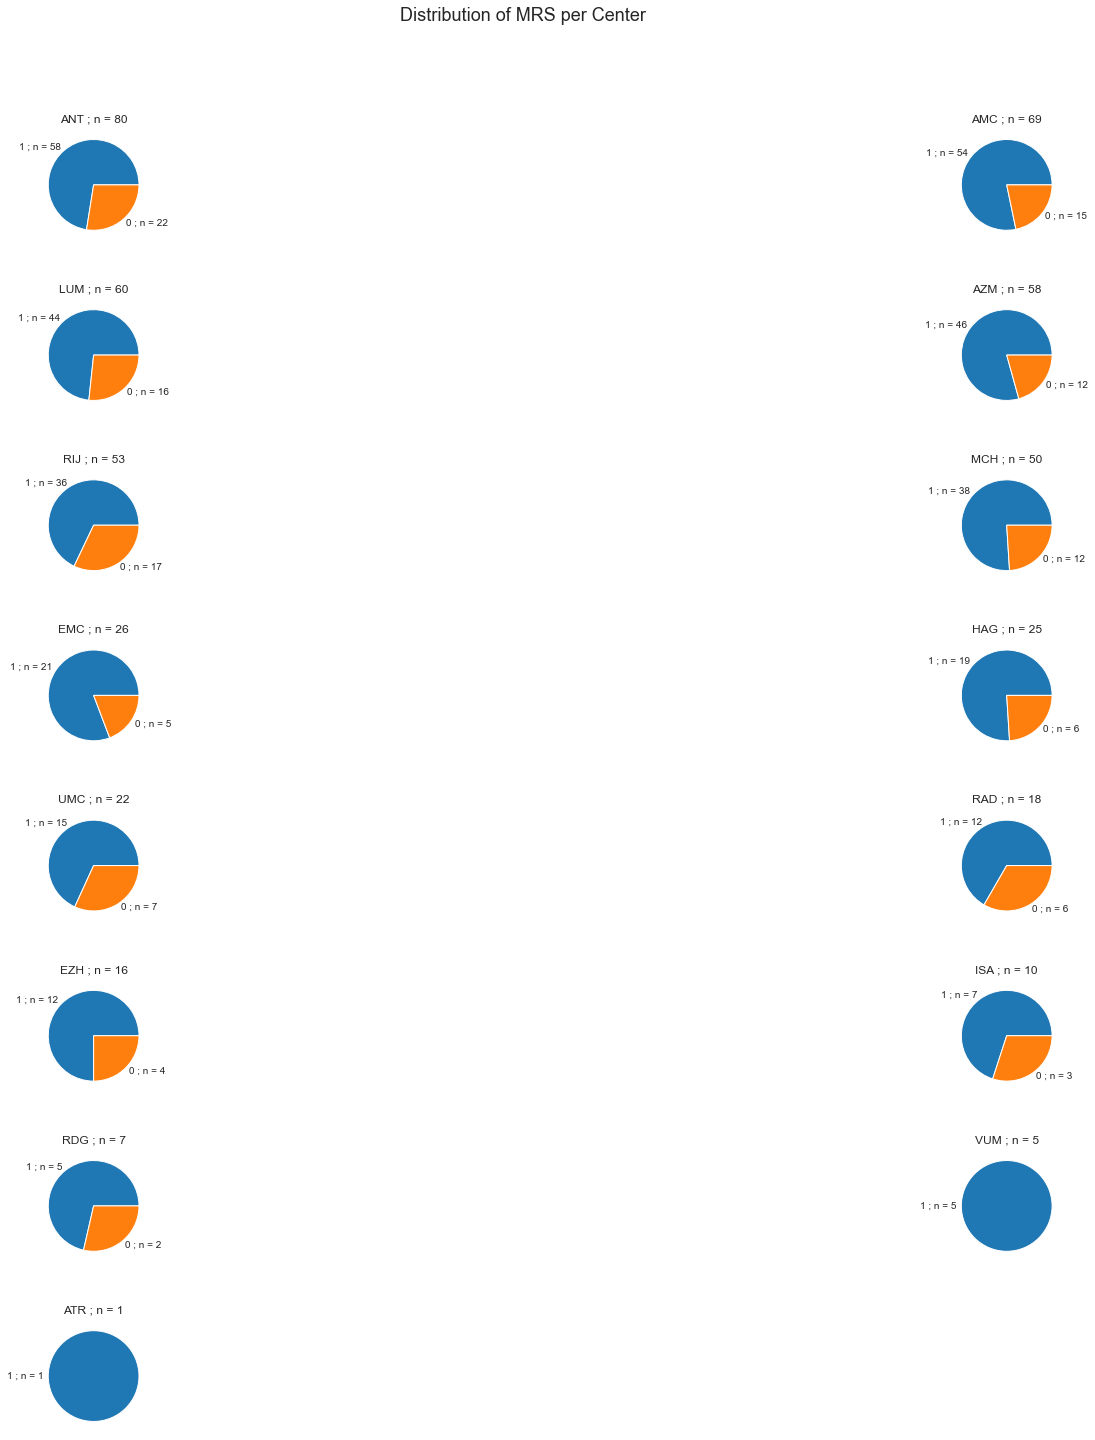

In [12]:
plot_feature_per_center(y_baseline)

In [13]:
#start with a fwe centerns and then increase and see if there is a saturation

In [14]:
SELECTED_CENTERS = ["ANT", "AMC", "LUM", "AZM"]

In [15]:
y_baseline[y_baseline["StudySubjectID"] == SELECTED_CENTERS[1]]

,StudySubjectID,mrs_d90d_c
0,AMC,1
1,AMC,1
2,AMC,1
3,AMC,1
4,AMC,1
...,...,...
64,AMC,1
65,AMC,0
66,AMC,1
67,AMC,1


In [16]:
y_baseline.iloc[:,:-1]

,StudySubjectID
0,AMC
1,AMC
2,AMC
3,AMC
4,AMC
...,...
495,VUM
496,VUM
497,VUM
498,VUM


In [17]:
data = pd.read_csv("../02-preprocessing/clinic_federated_preprocessed.csv")

In [18]:
data[data["StudySubjectID"] == "RDG"]

,female,age,r_ivtrom,intra_arterial_treatment,b_pvstr,b_pvdm,b_pvrr,b_pvaf,b_pvhc,nihsco_abl_c,StudySubjectID,mrs_d90d_c
413,0,1.166929,1,1,1,0,1,1,0,-0.466205,RDG,1
414,1,1.384802,1,0,0,1,1,0,0,-1.722338,RDG,1
415,0,-0.576057,1,1,0,1,1,0,1,-1.722338,RDG,0
416,0,0.949055,1,0,0,0,1,0,0,0.969376,RDG,1
417,1,0.440685,1,0,0,0,1,1,0,-2.440129,RDG,0
418,1,1.530051,1,0,0,0,1,0,1,0.431033,RDG,1
419,1,1.675299,1,1,1,0,1,0,1,0.431033,RDG,1


In [19]:
#!pip install shap==0.41

In [20]:
#!pip install daal==2021.4.0

In [21]:
data[data["StudySubjectID"] == "RDG"]["age"]

413    1.166929
414    1.384802
415   -0.576057
416    0.949055
417    0.440685
418    1.530051
419    1.675299
Name: age, dtype: float64

In [22]:
baseline_age_std = 13.769479770357794
baseline_age_mean = 64.932

In [23]:

data["age"] = (data["age"] * baseline_age_std ) + baseline_age_mean
data

,female,age,r_ivtrom,intra_arterial_treatment,b_pvstr,b_pvdm,b_pvrr,b_pvaf,b_pvhc,nihsco_abl_c,StudySubjectID,mrs_d90d_c
0,0,38.0,1,1,0,0,0,0,0,-0.825100,AMC,1
1,0,78.0,0,0,0,0,0,1,0,-0.286757,AMC,1
2,0,56.0,0,1,0,0,0,1,0,0.251586,AMC,1
3,0,62.0,1,1,0,0,0,1,0,0.431033,AMC,1
4,0,47.0,1,0,0,0,0,0,0,0.251586,AMC,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,63.0,1,1,1,0,1,0,0,0.251586,VUM,1
496,0,53.0,1,0,1,0,1,0,1,-0.645653,VUM,1
497,1,52.0,0,0,0,0,0,0,0,0.251586,VUM,1
498,0,67.0,1,1,0,0,0,1,0,0.251586,VUM,1


In [24]:
data[data["StudySubjectID"] == "RDG"]["age"].size

7

In [25]:
def plot_age_per_center(df: pd.DataFrame):




    plt.figure(figsize=(30, 24))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Distribution of Age per Center", fontsize=18, y=0.95)

    n = 0

    # loop through the length of tickers and keep track of index
    for center in df.StudySubjectID.value_counts().index.to_list():
        # add a new subplot iteratively
        ax = plt.subplot(8, 2, n + 1)

        df[df["StudySubjectID"] == center]["age"].hist(bins=range(20, 90, 5))


        #ax.pie(x=x, labels=y)


        # chart formatting
        ax.set_title(center + ' ; n = ' + str(df[df["StudySubjectID"] == center]["age"].size))
        ax.set_xlabel("")

        n += 1

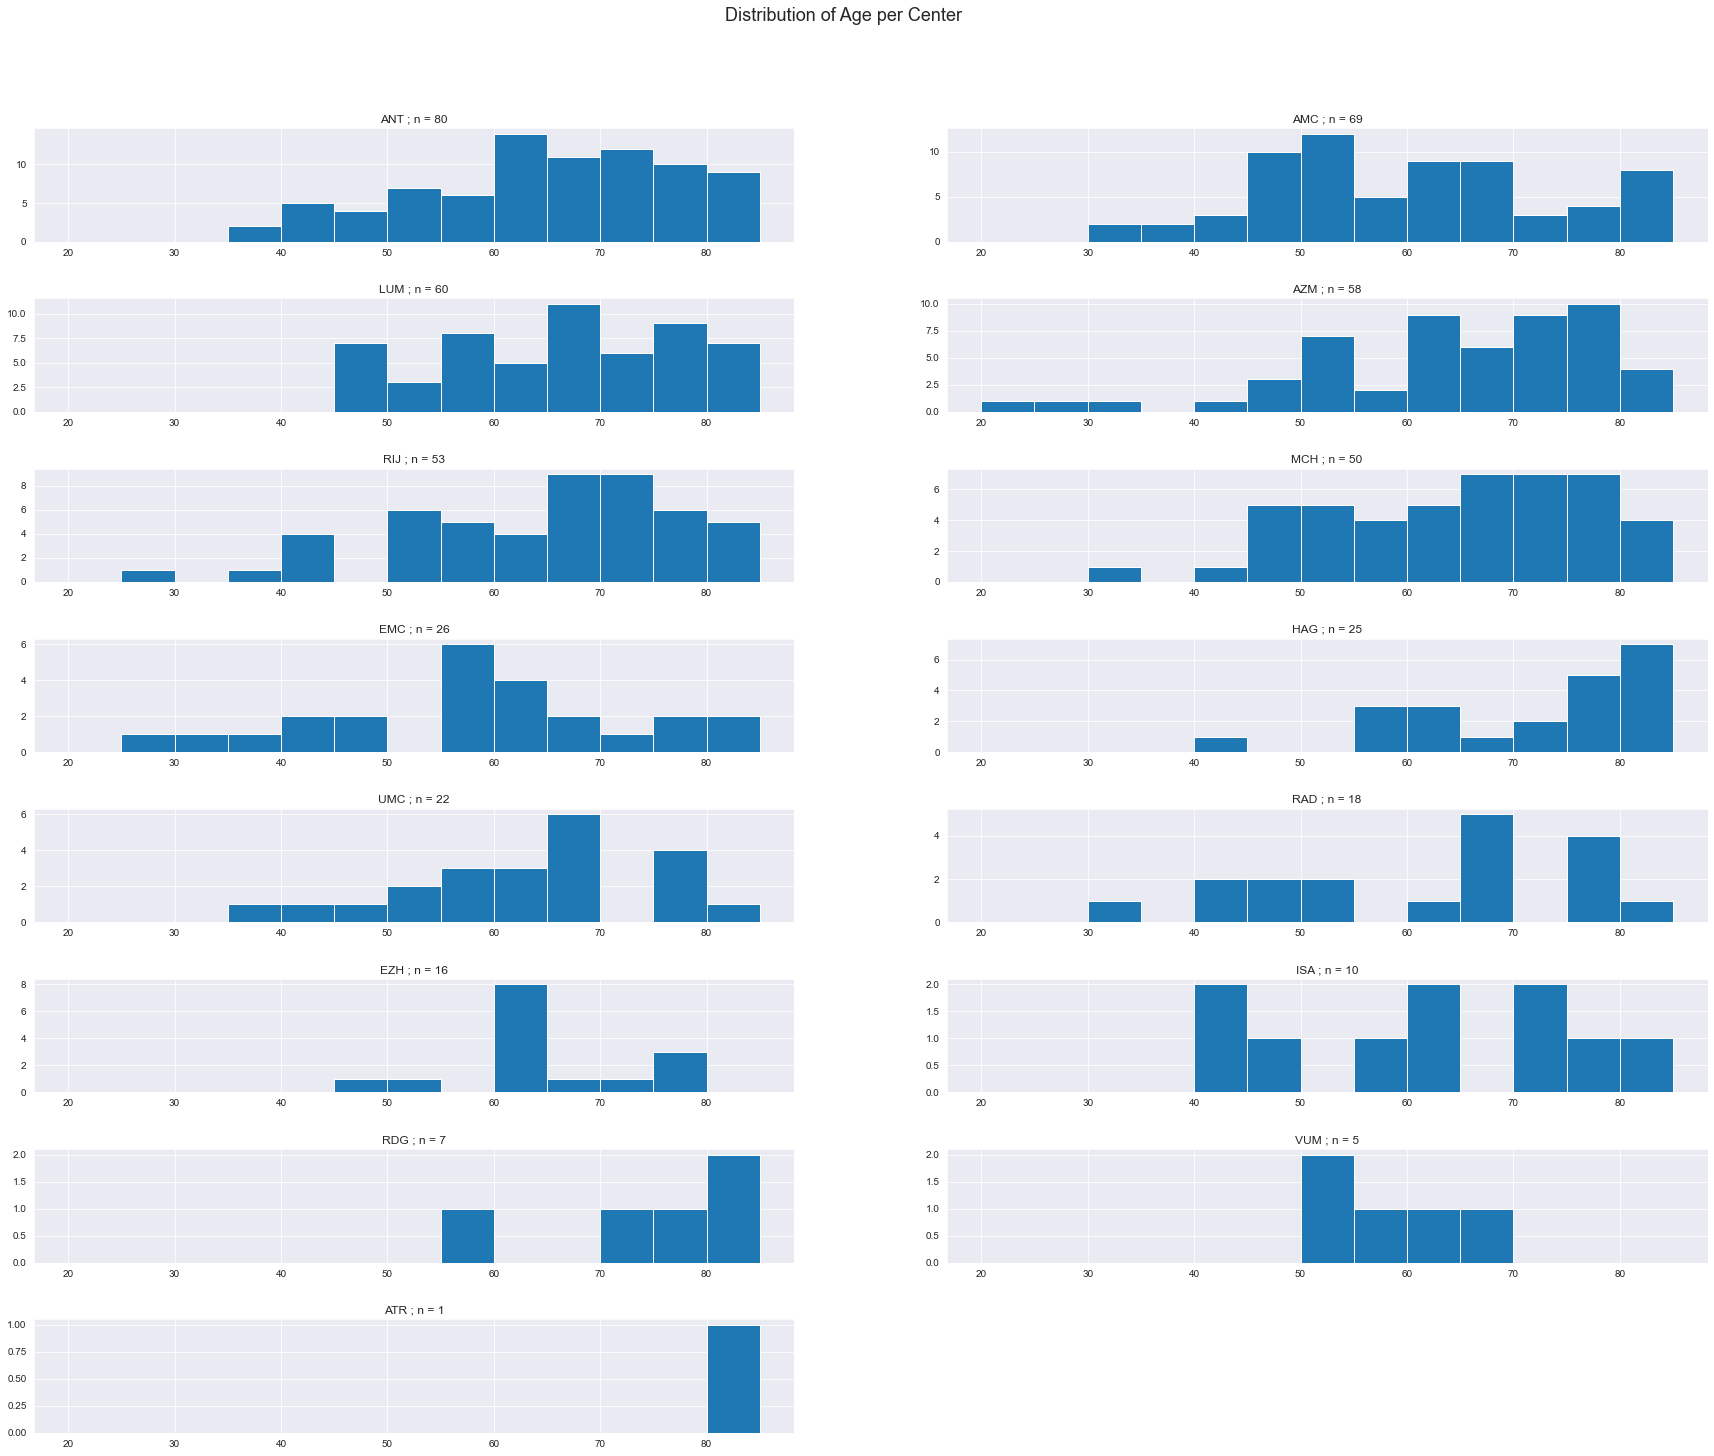

In [26]:
plot_age_per_center(data)

In [27]:
#!pip install numpy==1.21.0

In [28]:
#!pip uninstall quantus -y

In [36]:
center_by_size = ['ANT',
                  'AMC',
                  'LUM',
                  'AZM',
                  'RIJ',
                  'MCH',
                  'EMC',
                  'HAG',
                  'UMC',
                  'RAD',
                  'EZH',
                  'ISA',
                  'RDG',
                  'VUM',
                  'ATR']

In [41]:
def correlation_age_label(df: pd.DataFrame):
    for mycenter in center_by_size:
        corr_mat = df[df["StudySubjectID"] == mycenter][["age", "mrs_d90d_c"]].corr()
        print(f"Center {mycenter} corr = {corr_mat.iloc[0,-1]};  n = " + str(df[df["StudySubjectID"] == mycenter]["age"].size))
        #print(corr_mat)

In [42]:
correlation_age_label(data)

Center ANT corr = 0.19632496304433306;  n = 80
Center AMC corr = 0.07614544000665122;  n = 69
Center LUM corr = 0.27582031594254564;  n = 60
Center AZM corr = 0.06944772484316902;  n = 58
Center RIJ corr = -0.025464378261073808;  n = 53
Center MCH corr = 0.33906786251422066;  n = 50
Center EMC corr = 0.6722756996470777;  n = 26
Center HAG corr = 0.33923411384364144;  n = 25
Center UMC corr = -0.0046612575671756045;  n = 22
Center RAD corr = 0.5234341528281528;  n = 18
Center EZH corr = 0.037862439994020385;  n = 16
Center ISA corr = 0.35783002674779546;  n = 10
Center RDG corr = 0.8771189737969438;  n = 7
Center VUM corr = nan;  n = 5
Center ATR corr = nan;  n = 1
